# Automatically Choose `orientation="y"` When Aes Y Is Discrete

In [1]:
import pandas as pd

from lets_plot import *
from lets_plot.mapping import as_discrete


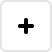
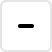
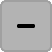
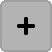
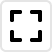
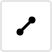
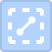
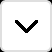
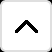
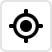
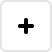
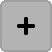
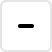
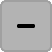
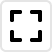
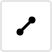
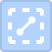
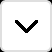
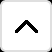
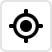

In [2]:
LetsPlot.setup_html()

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/gapminder.csv')
albania_df = df.loc[df['country'] == 'Albania']
df.head(3)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710


#### 1. How Does Automatic Setting `orientation="y"` Work

In [4]:
gggrid([
    ggplot(df, aes('continent', 'pop', fill='continent')) + geom_bar() + ggtitle('Default'),
    ggplot(df, aes('pop', 'continent', fill='continent')) + geom_bar() + ggtitle('Automatic setting orientation="y"')
], ncol=2)

#### 2. Marking by `as_discrete()`

If you're using continuous data for the Y-axis, the plot may be incorrect. Try marking the Y-axis data with the `as_discrete()` function, this will rotate your geom.

In [5]:
gggrid([
    ggplot(albania_df) + geom_bar(aes('lifeExp', 'year'), stat='sum', size=0),
    ggplot(albania_df) + geom_bar(aes('lifeExp', as_discrete('year')), stat='sum', size=0)
], ncol=2)

#### 3. Other Kinds of Geoms Support Automatic Choosing of Orientation

Such manipulations with automatic rotation can be done for geoms `geom_boxplot()`, `geom_violin()`, `geom_bar()` and `geom_lollipop()`.

In [6]:
gggrid([
    ggplot(df, aes('continent', 'lifeExp', fill='continent')) + geom_boxplot(),
    ggplot(df, aes('lifeExp', 'continent', fill='continent')) + geom_boxplot(),
    ggplot(df, aes('continent', 'lifeExp', fill='continent')) + geom_violin(),
    ggplot(df, aes('lifeExp', 'continent', fill='continent')) + geom_violin(),
    ggplot(albania_df, aes(as_discrete('year'), 'lifeExp')) + geom_lollipop(stat='sum', size=2),
    ggplot(albania_df, aes('lifeExp', as_discrete('year'))) + geom_lollipop(stat='sum', size=2),
], ncol=2)

#### 4. `stat='boxplot'`,  `stat='boxplot_outlier'`, `stat_summary()`

In [7]:
gggrid([
    ggplot(df, aes('continent', 'lifeExp')) + geom_pointrange(stat='boxplot'),
    ggplot(df, aes('lifeExp', 'continent')) + geom_pointrange(stat='boxplot'),
    ggplot(df, aes('continent', 'lifeExp')) + geom_pointrange(stat='boxplot_outlier'),
    ggplot(df, aes('lifeExp', 'continent')) + geom_pointrange(stat='boxplot_outlier'),
    ggplot(df, aes('continent', 'lifeExp')) + stat_summary(),
    ggplot(df, aes('lifeExp', 'continent')) + stat_summary()
], ncol=2)